In [1]:
from xml.dom.minidom import Document
from pymongo import MongoClient
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns



def mongoimport(csv_path):
    
    # drop all documents   
    hr_df = pd.read_csv(csv_path)

    payload = json.loads(hr_df.to_json(orient = 'records'))
    collection.delete_many({})
    collection.insert_many(payload)

if __name__ == "__main__":
    client = MongoClient("mongodb://localhost:27017")
    print(client)
    db = client['airline_delayDB']
    collection = db['flights']
    mongoimport('Flights_Delay.csv')


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [29]:
  # b) Average arrival delay caused by airlines
avg_delay=collection.aggregate([{'$group':{'_id':{},'avgFlightDelay':
                            {'$avg':'$ARRIVAL_DELAY'}}},{'$project':{'_id':0}}])
for i in avg_delay:
    print(i)
        
        
print("*"*40)

{'avgFlightDelay': 7.545457931394093}
****************************************


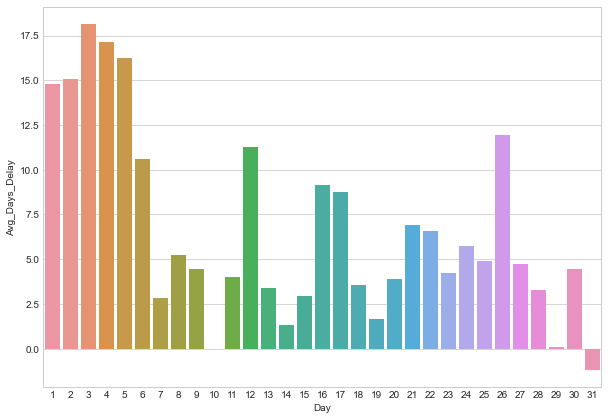

In [30]:
 #c) Days of months with respect to average of arrival delays.
    #   [Create a suitable plot using matplotlib/seaborn]
    
avg_arrival_days=collection.aggregate([{'$group': {'_id':'$DAY','Avg_Days_Delay':
                                    {'$avg':'$ARRIVAL_DELAY'}}},{'$sort':{'Avg_Days_Delay':-1}}])
    
avg_arrival_days_df=pd.DataFrame(avg_arrival_days)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(x=avg_arrival_days_df['_id'],y=avg_arrival_days_df['Avg_Days_Delay'])
plt.xlabel('Day')
plt.show()

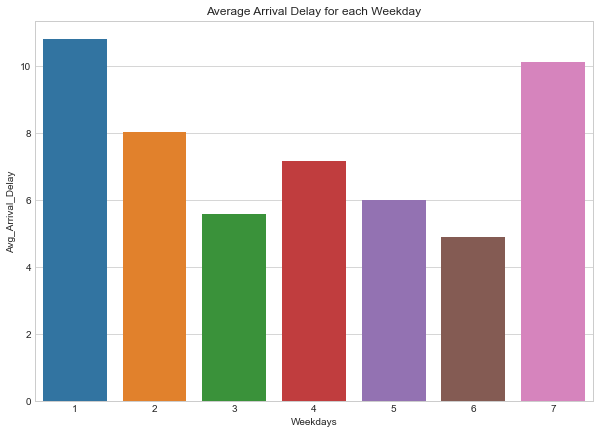

In [31]:
   #d Arrange weekdays with respect to the average arrival days caused. 
    #  [Create a suitable plot using matplotlib/seaborn]
    
avg_arrival_weekdays=collection.aggregate([{'$group': {'_id':'$DAY_OF_WEEK', 'Avg_Arrival_Delay':
                                          {'$avg': '$ARRIVAL_DELAY'}}},{'$sort': {'Avg_Arrival_Delay': -1}}])
    
    
avg_arrival_weekdays_df=pd.DataFrame(avg_arrival_weekdays)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=avg_arrival_weekdays_df['_id'],y=avg_arrival_weekdays_df['Avg_Arrival_Delay'])
plt.title('Average Arrival Delay for each Weekday')
plt.xlabel('Weekdays')
plt.show()

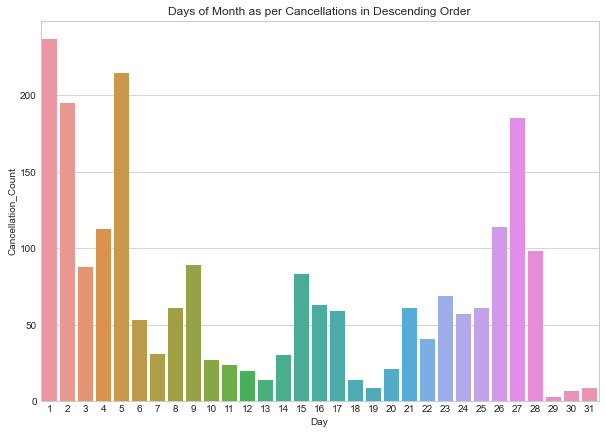

In [32]:
    #e) Arrange Days of month as per cancellations done in descending order.  
    #   [Create a suitable plot using matplotlib/seaborn]

days_per_cancellation = collection.aggregate([{'$match' : {'CANCELLED':1}},
                                    {'$group':{'_id':'$DAY',
                                    'Cancellation_Count':{'$count':{}}}},
                                     {'$sort':{'Cancellation_Count': -1}}])
    
days_per_cancellation_df=pd.DataFrame(days_per_cancellation)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=days_per_cancellation_df['_id'],y=days_per_cancellation_df['Cancellation_Count'])
plt.title('Days of Month as per Cancellations in Descending Order')
plt.xlabel('Day')
plt.show()
    

In [35]:
 #f) Find the busiest airports with respect to day of week. Create a suitable plot using matplotlib/seaborn.
arrival_airport_count=collection.aggregate([{'$group':{'_id':'$DAY_OF_WEEK'
                                              ,'count':{'$count':{}}}},
                                            {'$sort':{'DESTINATION_AIRPORT': -1}}])
        
departure_airport_count = collection.aggregate([{'$group':{'_id':'$DAY_OF_WEEK'
                                              ,'count':{'$count':{}}}},
                                             {'$sort':{'ORIGIN_AIRPORT': -1}}])
    
    
    
arrival_airport_count_df=pd.DataFrame(arrival_airport_count)
departure_airport_count_df=pd.DataFrame(departure_airport_count)
    
dict1=arrival_airport_count_df.to_dict()
print(arrival_airport_count_df)

   _id  count
0    7   7827
1    5   8886
2    1   8539
3    2   7785
4    3   7684
5    4   8395
6    6   6884


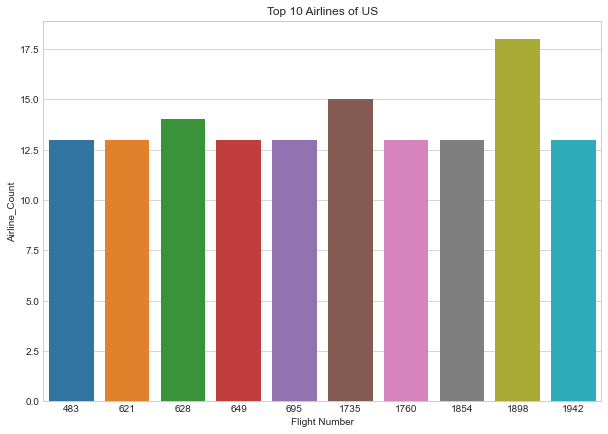

In [24]:
    #g Find top 10 Airlines of US. Create a suitable plot using matplotlib/seaborn.
top_US_airlines=collection.aggregate([{'$group':{'_id':'$AIRLINE'
                                          ,'Airline_Count':{'$count':{}}}},
                            {'$sort':{'Airline_Count': -1}}, {'$limit':10}])
    
   
   
top_US_airlines = collection.aggregate([{ '$match':{'AIRLINE':"US"}},
                                        {'$group' :{'_id' : '$FLIGHT_NUMBER', 'Airline_Count':{'$count' : {}}}},
                                            {'$sort':{'Airline_Count':-1}},
                                            {'$limit':10}])
    
airline_df=pd.DataFrame(top_US_airlines)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=airline_df['_id'],y=airline_df['Airline_Count'])
plt.title('Top 10 Airlines of US')
plt.xlabel('Flight Number')
plt.show()

In [38]:
    #h) Finding airlines that make the maximum, minimum number of cancellations.
    
min_cancellation = collection.aggregate([{'$match' : {'CANCELLED':1}},
                                   {'$group':{'_id':'$AIRLINE',
                                    'min_cancellation':{'$count':{}}}},
                                   {'$sort':{'min_cancellation': 1}}, {'$limit':1}
                                         ])
for i in min_cancellation:
        print(i)
    
max_cancellation = collection.aggregate([{'$match' : {'CANCELLED':1}},
                                   {'$group':{'_id':'$AIRLINE',
                                  'max_cancellation':{'$count':{}}}},
                                  {'$sort':{'max_cancellation': -1}}, {'$limit':1}
                                        ])
for i in max_cancellation:
        print(i)
    
    
    
    print("*"*40)

{'_id': 'HA', 'min_cancellation': 3}
{'_id': 'MQ', 'max_cancellation': 414}
****************************************


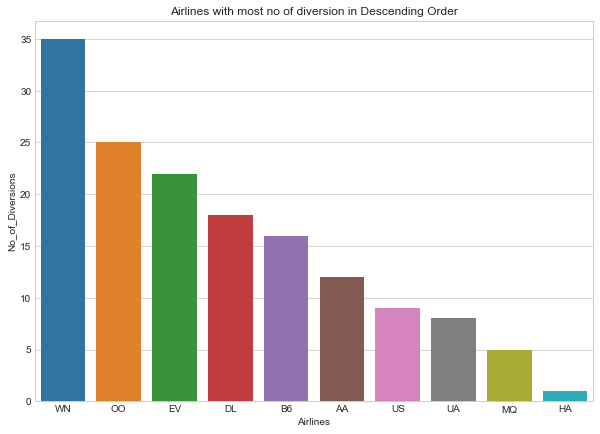

In [39]:
   # i) Find and show airlines names in descending that make the most number of diversions made.
    #    [Create a suitable plot using matplotlib/seaborn]
    
airline_diversions = collection.aggregate([{'$match' : {'DIVERTED':1}},
                                    {'$group':{'_id':'$AIRLINE',
                                 'No_of_Diversions':{'$count':{}}}},
                                {'$sort':{'No_of_Diversions': -1}}])
    
    
airline_diversion_df=pd.DataFrame(airline_diversions)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=airline_diversion_df['_id'],y=airline_diversion_df['No_of_Diversions'])
plt.title('Airlines with most no of diversion in Descending Order')
plt.xlabel('Airlines')
plt.show()

In [51]:
    #j) Finding days of month that see the most number of diversion
no_of_diversions = collection.aggregate([{'$match' : {'DIVERTED':1}},
                                     {'$group':{'_id':'$DAY',
                                     'No_of_Diversions':{'$count':{}}}},
                                     {'$sort':{'No_of_Diversions': -1}},{'$limit':1}
                                           ])
    
for i in no_of_diversions:
         print(i)
    
    
    
print("*"*40)

{'_id': 2, 'No_of_Diversions': 15}
****************************************


In [16]:
    #k) Calculating mean and standard deviation of departure delay for all flights in minutes
departure_delay = collection.find({},{'DEPARTURE_DELAY':1,'_id':0})
    
departure_delay_df=pd.DataFrame(departure_delay)
print("Mean:",departure_delay_df.mean())
print("Standard Deviation:",departure_delay_df.std())
    
    
print("*"*40)

Mean: DEPARTURE_DELAY    11.329091
dtype: float64
Standard Deviation: DEPARTURE_DELAY    39.620916
dtype: float64
****************************************


In [17]:
#l) Calculating mean and standard deviation of arrival delay for all flights in minutes
arrival_delay = collection.find({},{'ARRIVAL_DELAY':1,'_id':0})
    
arrival_delay_df=pd.DataFrame(arrival_delay)
print("Mean:",arrival_delay_df.mean())
print("Standard Deviation:",arrival_delay_df.std())
    
    
print("*"*40)

Mean: ARRIVAL_DELAY    7.545458
dtype: float64
Standard Deviation: ARRIVAL_DELAY    42.378386
dtype: float64
****************************************


In [18]:
  #m - not found
    
    #n) Finding all diverted Route from a source to destination Airport & which route is the most diverted route.
no_of_diversions=collection.aggregate([{'$match':{'DIVERTED':1}},
                                    {'$group' :{'_id' : {'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT',"DESTINATION_AIRPORT":'$DESTINATION_AIRPORT'},
                                               'Most_Deversions_Count':{'$sum':1}}},
                                    {'$sort':{'Most_Deversions_Count':-1}}                    ])
        
    #ii)
no_of_diversions_df=pd.DataFrame(no_of_diversions)
diversions_max=no_of_diversions_df.get('Most_Deversions_Count').max()
    
print(no_of_diversions_df[no_of_diversions_df['Most_Deversions_Count']==diversions_max]['_id'])
   
    
print("*"*40)

0    {'ORIGIN_AIRPORT': 'CLT', 'DESTINATION_AIRPORT...
1    {'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT...
2    {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT...
3    {'ORIGIN_AIRPORT': 'STT', 'DESTINATION_AIRPORT...
4    {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
5    {'ORIGIN_AIRPORT': 'PHL', 'DESTINATION_AIRPORT...
6    {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
7    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
8    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
Name: _id, dtype: object
****************************************


In [20]:
#o) When is the best time of day/day of week/time of year to fly with minimum delay
total_delay=collection.aggregate([{'$group':{'_id':'$_id','total':{'$sum':'$ARRIVAL_DELAY'}}},{'$sort': {'total':1}},
                                  {'$limit':1}])
for i in total_delay:
 print(i)

{'_id': ObjectId('63649e59979ab9ec901003d4'), 'total': -76.0}
